<div class="alert alert-block alert-success">
    <b>ARTIFICIAL INTELLIGENCE (E016330)</b> <br>
ALEKSANDRA PIZURICA <br>
GHENT UNIVERSITY <br>
AY 2022/2023 <br>
Assistent: Srdan Lazendic
</div>

### Lab assignment 3: Will a patient have a 10 year risk of developing a cardio vascular diseases?

The `framingham.csv` file contains medical data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts, who participated in cardiovascular disease prevention trials. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The set contains 15 attributes that combine the sociological and medical characteristics of the respondents, such as age, gender, body mass index, blood sugar concentration and others. Each attribute is a potential risk factor. It is necessary to make a classifier that can predict the occurrence of heart problems based on these data. Information on the occurrence of subjects' heart problems was recorded at the level of the TenYearCHD attribute.

In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [66]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix

**Question 1:** Load the data contained in the `framingham.csv` file. 

In [67]:
data = pd.read_csv('framingham.csv')

**Question 2:** Print the shape of the data, type of the data and first 3 rows. 

In [68]:
print(data.shape)

(4238, 16)


In [69]:
print(data.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [70]:
print(data.head(3))

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   

   TenYearCHD  
0           0  
1           0  
2           0  


**Question 3:** Check for duplicates and missing values in the data. Drop all rows that contain at least one missing value. Check again the shape of your data.

In [71]:
duplicates = data.duplicated()
print(duplicates.sum())

0


In [72]:
missing = data.isnull().sum()
print(missing)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [73]:
data = data.dropna()

In [74]:
print(data.shape)

(3656, 16)


**Question 4:** Check which features are correlated with each other and with the outcome variable `TenYearCHD`. Create a `seaborn` correlation heatmap. 

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.024387   0.017677       0.206778    0.331243   
age             -0.024387  1.000000  -0.158961      -0.210862   -0.189099   
education        0.017677 -0.158961   1.000000       0.025253    0.013527   
currentSmoker    0.206778 -0.210862   0.025253       1.000000    0.773819   
cigsPerDay       0.331243 -0.189099   0.013527       0.773819    1.000000   
BPMeds          -0.052128  0.134670  -0.013647      -0.051936   -0.046479   
prevalentStroke -0.002308  0.050864  -0.030353      -0.038159   -0.036283   
prevalentHyp     0.000806  0.306693  -0.079100      -0.107561   -0.069890   
diabetes         0.013833  0.109027  -0.039547      -0.041859   -0.036934   
totChol         -0.070229  0.267764  -0.012956      -0.051119   -0.030222   
sysBP           -0.045484  0.388551  -0.124511      -0.134371   -0.094764   
diaBP            0.051575  0.208880  -0.058502      -0.115748   -0.056650   

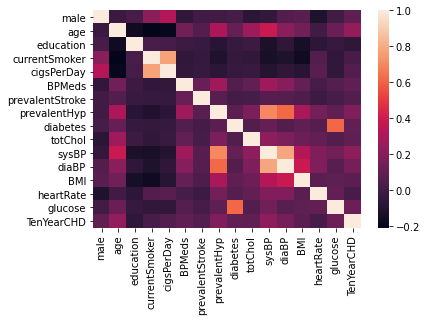

In [75]:
corr = data.corr()
print(corr)
sns.heatmap(corr)
plt.show()

**Question 5:** What can we conclude based on the obtained `Heatmap` in **Question 4**? Which column can be dropped from the data? Explain your reasoning. Afterwards, drop the column you find irrelevant.

In [76]:
data = data.drop(columns=['sysBP'])

**Question 6:** Show a bar chart comparing proportion of male and female patients, i.e., show the patient statistics by gender.

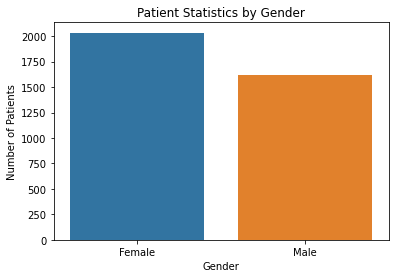

In [77]:

ax = sns.countplot(x='male', data=data)
ax.set(xticklabels = (["Female", "Male"]))

plt.title("Patient Statistics by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")

# Show the plot
plt.show()

**Question 7:** Identify the features with the most importance for the outcome variable `TenYearCHD`. Apply `SelectKBest` class to extract top $10$ most impactful features for the target variable. Visualize the selected features by using `bar chart` and create a new dataframe, named `data_ten`, with selected features. Note that you should have a dataframe with $11$ columns!

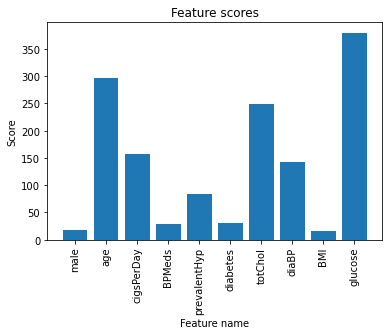

In [86]:

X = data.drop(columns=['TenYearCHD'])  
y = data['TenYearCHD'] 

# Use SelectKBest to select the top 10 most impactful features
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)

# Create a new dataframe 
data_ten = pd.concat([pd.DataFrame(X_new), y], axis=1)

names = X.columns.values[selector.get_support()]

scores = selector.scores_[selector.get_support()]


#Plot the result
fig, ax = plt.subplots()


x = names
y = scores


ax.bar(x, y)


ax.set_title('Feature scores')
ax.set_xlabel('Feature name')
ax.set_ylabel('Score')

plt.xticks(rotation=90)

# Show the plot
plt.show()

**Question 8:** Since we want to try out different models we need to scale our features. Do this in the following line by using the `MinMaxScaler`. 

In [87]:

X = data.drop(columns=['TenYearCHD']) 
y = data['TenYearCHD']  

scaler = MinMaxScaler()


X_scaled = scaler.fit_transform(X)



**Question 9:** Extract the value of the target variable `TenYearCHD`, which predicts the possibility of disease in the next $10$  years, and then divide the data into a training set and a test set in the ratio $4:1$. When dividing the data, take into account the stratification. Explain shortly, in words, why the stratification is important. Set the `random_state` parameter to  $5$.

In [88]:
from sklearn.model_selection import train_test_split

y = data['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [89]:
#Stratification is a technique employed to ensure that the training and test sets for a
#model are representative of the overall distribution of the target variable, 
#particularly when the target variable is imbalanced. This is useful because an 
#imbalanced distribution of the target variable can lead to a biased model that has a badn performance
#on certain classes. Stratification is important to mitigate this issue by ensuring that
#the training and test sets have a similar distribution of the target variable as the overall dataset.


**Question 10:** In the previous notebook, we have already explained and tested different `linear regression` models. Choose one of the linear regression models and train it on the data prepared in the previous step, if possible. Now do the same with the `Logistic Regression` model, i.e., create and train a `logistic regression` model with weights $1$  and $4$  that, respectively, correspond to classes $0$ and $1$. 
- What can you conclude based on the obtained results with the two models? Are both of them suitable? Shortly explain your reasoning. 
- Take now the default setting in your `Logistic Regression` model. What do you observe?
- What does the `F1` score tell you in this case?

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)

print(linear_regression.coef_)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'R2 Score: {r2:.3f}')


[ 4.75871349e-02  8.81685254e-03 -5.08424048e-03  1.03546337e-02
  2.07687765e-03  2.60557107e-02  1.19251296e-01  4.94637838e-02
 -1.89715190e-02  9.13688800e-05  1.42748684e-03  1.57260282e-03
 -1.82310842e-04  1.23900142e-03]
MAE: 0.235
MSE: 0.115
R2 Score: 0.110


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


logistic_regression = LogisticRegression(class_weight={0: 1, 1: 4},max_iter=10000)

logistic_regression.fit(X_train, y_train)

print(logistic_regression.coef_)

y_pred = logistic_regression.predict(X_test)

f1 = f1_score(y_test, y_pred)


print(f'F1 Score: {f1:.3f}')

[[ 0.46239096  0.07575384 -0.06381186  0.14392212  0.01537781  0.19088105
   0.56623331  0.33377588 -0.26991066  0.00214644  0.0123901   0.01912272
  -0.00217944  0.00786477]]
F1 Score: 0.392


In [92]:
#Logistic Regression is more suitable for our application with respect to linear regression,
#since the final goal of our task is to predicting binary outcomes.
#I observe a higher performance with class weights in the logistic regression model, 
#this means that the class weights are helping to balance the class distribution in the dataset, 
#which is imbalanced.

**Question 11:** Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e., one class label has a very high number of observations and the other has a very low number of observations.
- Is there a class imbalance in our case? Has the dataset been split evenly by class? Use the `value_counts` function.
- Visualize the classes by using the `countplot` function inside of `seaborn`.

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

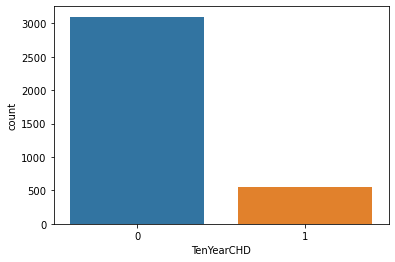

In [93]:
class_counts = y.value_counts()

sns.countplot(y)

There are different techniques that can be used to handle imbalanced datasets:
- Use the right evaluation metrics that take class imbalance into account 
- Resample the training set 
- Use K-fold Cross-Validation 
- Ensemble Different Resampled Datasets$\dots$

In this notebook we will consider the method of resampling, more specifically, data undersampling or oversampling (or both), which will allow us to obtain the equal number of instances from both the majority and minority class. 

**Question 12:** Interesting results may be achieved by combining both oversampling and undersampling. This can result in improved overall performance compared to performing one or the other techniques alone. In order to combine oversampling we will use [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html#imblearn.combine.SMOTETomek) which combines the oversampling technique [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) and undersampling technique [TomekLinks](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html).

- Explain in words what the advantage of combining both over- and under-sampling could be, compared to using one of them individually. 
- Perform the combination of over- and under-sampling by using `SMOTETomek`. Afterwards, save the obtained dataset as a `DataFrame` called **data_new**. 
- Visualize the classes again by using the `countplot` function.

In [94]:
# First time uncomment this line and install imblearn
from imblearn.combine import SMOTETomek

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

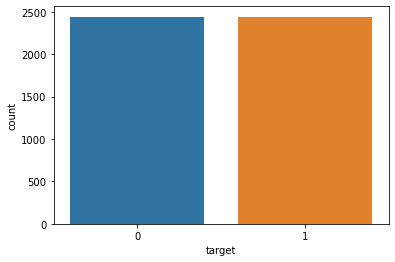

In [97]:

smt = SMOTETomek()

X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

data_new = pd.DataFrame(data=X_resampled, columns=X_train.columns)

data_new['target'] = y_resampled

sns.countplot(data_new['target'])

**Question 13:** Extract the value of the target variable `TenYearCHD` from the **data_new** `DataFrame`, and divide again the data into a training set and a test set in the ratio $4:1$. Create and train a `logistic regression` model on this balanced dataset. What do you observe compared to the previous `LogisticRegression` model from **Question 10**?

In [98]:

y = data_new['target']

X = data_new.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

model = LogisticRegression(max_iter=10000)


model.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f1)

0.5043914680050188


In [99]:
# in this case I obtain an higher f1 score, because the class are more balanced, so the performance is higher

**Question 14:** Now we will use the `DecisionTreeClassifier` function.

- Perform now a decision tree training by choosing the attribute selection measure and split strategy yourself, as well as the maximum depth of the three.
- Calculate the `accuracy` and the `F1 score` of the obtained decision tree model.
- Plot the corresponding confusion matrix. What does it tell us? Explain it shortly.

In [103]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
# Create an instance of the DecisionTreeClassifier class
clf = DecisionTreeClassifier(criterion='entropy', max_features=0.9, splitter='best', max_depth=3, random_state=7)
 
# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy and F1 score of the model
accuracy = clf.score(X_test, y_test)
f1_score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 score:", f1_score)

Accuracy: 0.6499488229273286
F1 score: 0.6724137931034482


[[284 226]
 [116 351]]


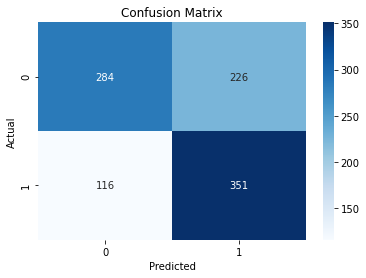

In [104]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#The element "284" in the matrix indicates the number of true positives. 

#The second element, "226", indicates the number of false negatives.

#The third element in the matrix, "116", indicates the number of false positives. 
 
#The fourth element, "351", indicates the number of true negatives. 

#By looking to the confusion matrix we cam conlude that the classifier computes a relatively large number of false negatives and 
#false positives, with respect to the number of true negatives and true positives.This means that the classifier's accuracy 
#may be improved by adjusting its parameters or using a different approach. It may be worthwhile to try different techniques 
#to see if the classifier's performance can be improved.